In [49]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [50]:
df = pd.read_csv('Fraud.csv')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [52]:
## encoding the categorical variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['type'] = encoder.fit_transform(df['type'])
df['nameDest'] = encoder.fit_transform(df['nameDest'])
df['nameOrig'] = encoder.fit_transform(df['nameOrig'])

In [54]:
corr = df.corr()
print(corr)

                    step      type    amount  nameOrig  oldbalanceOrg  \
step            1.000000  0.006635  0.022373 -0.000146      -0.010058   
type            0.006635  1.000000  0.088419  0.000213      -0.339760   
amount          0.022373  0.088419  1.000000  0.000124      -0.002762   
nameOrig       -0.000146  0.000213  0.000124  1.000000      -0.000648   
oldbalanceOrg  -0.010058 -0.339760 -0.002762 -0.000648       1.000000   
newbalanceOrig -0.010299 -0.352758 -0.007861 -0.000675       0.998803   
nameDest        0.003767  0.584275 -0.169150 -0.000256      -0.162688   
oldbalanceDest  0.027665 -0.104679  0.294137  0.000245       0.066243   
newbalanceDest  0.025888 -0.059364  0.459304  0.000255       0.042029   
isFraud         0.031578  0.020833  0.076688 -0.000464       0.010154   
isFlaggedFraud  0.003277  0.002685  0.012295  0.000667       0.003835   

                newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  \
step                 -0.010299  0.003767       

In [56]:
corr = correlations = df.corr()['isFraud'].sort_values(ascending=False)
print(correlations)
# dropping the feature that is not correlated to target (only numerical values not encoded categorical)
# oldbalanceOrg     0.010154
# newbalanceDest    0.000535 
# oldbalanceDest   -0.005885
# newbalanceOrig   -0.008148
df = df.drop(['oldbalanceOrg','newbalanceDest','oldbalanceDest','newbalanceOrig'],axis=1)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig         -0.000464
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.021963
Name: isFraud, dtype: float64


In [58]:
# plt.figure(figsize=(10,5))
# sn.boxplot(data=df)
# plt.show()

In [59]:
# capping the outliers
def cap_outliers(df):
    for cols in ['amount']:
        Q1 = df[cols].quantile(0.25) # first quantile range
        Q3 = df[cols].quantile(0.75) # third quantile range
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[cols] = df[cols].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    return df

In [60]:
df = cap_outliers(df)

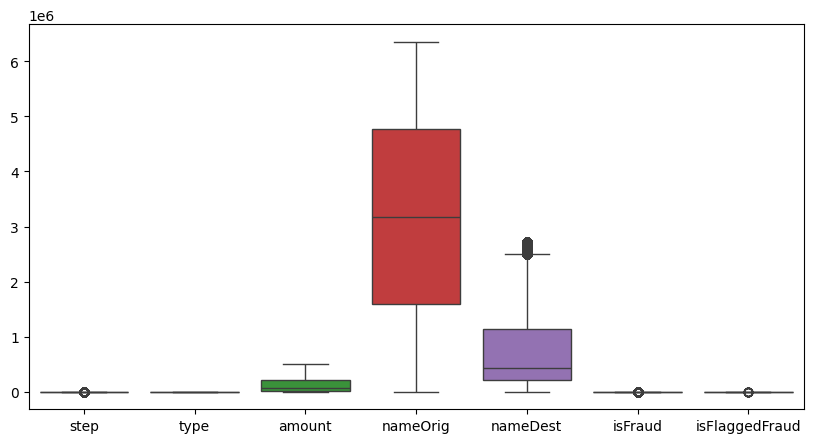

In [61]:
plt.figure(figsize=(10,5))
sn.boxplot(data=df)
plt.show()

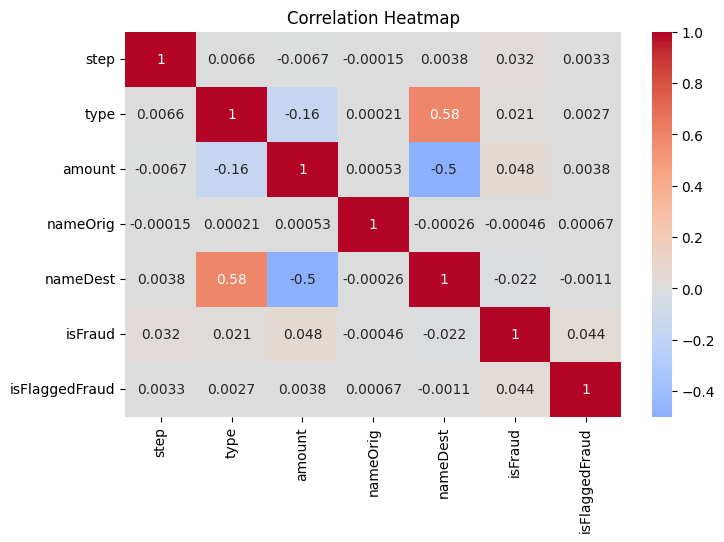

In [62]:
corr = df.corr()
plt.figure(figsize=(8,5))
sn.heatmap(corr, cmap='coolwarm', annot=True, center=0,)
plt.title('Correlation Heatmap')
plt.show()

In [63]:
# performing the scaling operation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [64]:
scaled_df

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud
0,-1.703042,0.952399,-0.837184,-1.318825,1.220490,-0.035951,-0.001586
1,-1.703042,0.952399,-0.891721,-0.538520,1.316232,-0.035951,-0.001586
2,-1.703042,1.693076,-0.903232,-1.185630,-0.408856,27.815483,-0.001586
3,-1.703042,-0.528954,-0.903232,1.445742,-0.472820,27.815483,-0.001586
4,-1.703042,0.952399,-0.824680,0.146834,0.109953,-0.035951,-0.001586
...,...,...,...,...,...,...,...
6362615,3.510123,-0.528954,1.418354,1.349554,-0.320647,27.815483,-0.001586
6362616,3.510123,1.693076,2.526400,-0.784815,-0.647092,27.815483,-0.001586
6362617,3.510123,-0.528954,2.526400,-1.440909,-0.850659,27.815483,-0.001586
6362618,3.510123,1.693076,2.526400,-0.503661,-0.568766,27.815483,-0.001586


In [65]:
corr = scaled_df.corr()

In [66]:
## checking for missing values and data imbalance
print(df.isna().sum())

## checking for data imbalance
print(df['isFraud'].value_counts())

## calculating the percentage
print(df['isFraud'].value_counts(normalize=True) * 100)
"""
0    99.870918
1     0.129082

our data set is imbalanced majority(0) is leading
"""
## balancing using smote or borderline smote

step              0
type              0
amount            0
nameOrig          0
nameDest          0
isFraud           0
isFlaggedFraud    0
dtype: int64
isFraud
0    6354407
1       8213
Name: count, dtype: int64
isFraud
0    99.870918
1     0.129082
Name: proportion, dtype: float64


'\n0    99.870918\n1     0.129082\n\nour data set is imbalanced majority(0) is leading\n'

In [67]:
#installing imbalanced-learn module
# ! pip install imbalanced-learn

In [68]:
# dropping the heurisitic feature
new_df = df.drop('isFlaggedFraud',axis=1)


In [69]:
#splitting into train test_split
X = new_df.drop('isFraud',axis=1)
y = new_df['isFraud']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y) # since our dataset is imbalance so to maintain the proportion of fraud and non fraud cases

## Performance Improvements & Optimizations

Based on your current fraud detection model, here are key performance improvements needed:

### 1. **Data Issues**
- **Problem**: Very large SMOTE dataset (10M+ samples) causing memory issues
- **Solution**: Use sampling strategies and optimize data handling

### 2. **Model Performance Issues**
- **Problem**: Random Forest may not be optimal for this imbalanced dataset
- **Solution**: Try ensemble methods, gradient boosting, or neural networks

### 3. **Feature Engineering Gaps**
- **Problem**: Limited feature engineering for fraud detection
- **Solution**: Create time-based, transaction pattern, and behavioral features

### 4. **Evaluation Metrics**
- **Problem**: Accuracy alone insufficient for imbalanced fraud detection
- **Solution**: Focus on Precision, Recall, F1-score, AUC-ROC

In [70]:
# PERFORMANCE FIX 1: Optimize SMOTE sampling
# Instead of full SMOTE, use strategic sampling for better performance

from imblearn.over_sampling import SMOTE
from collections import Counter

# Check original class distribution
print("Original distribution:", Counter(y_train))

# Use SMOTE with sampling strategy to create more balanced but manageable dataset
# Instead of 1:1 ratio, use 1:5 ratio to reduce computational load
smote_balanced = SMOTE(
    sampling_strategy=0.2,  # Minority class will be 20% of majority class
    random_state=42,
    k_neighbors=3  # Reduce neighbors for faster processing
)

X_train_balanced, y_train_balanced = smote_balanced.fit_resample(X_train, y_train)
print("After optimized SMOTE:", Counter(y_train_balanced))

Original distribution: Counter({0: 5083526, 1: 6570})
After optimized SMOTE: Counter({0: 5083526, 1: 1016705})


In [71]:
# PERFORMANCE FIX 2: Advanced Feature Engineering for Fraud Detection
# Create more meaningful features that capture fraud patterns

def create_fraud_features(df):
    """Create advanced features for better fraud detection"""
    df_enhanced = df.copy()
    
    # 1. Transaction amount features
    df_enhanced['amount_log'] = np.log1p(df_enhanced['amount'])  # Log transform for skewed amounts
    df_enhanced['amount_zscore'] = (df_enhanced['amount'] - df_enhanced['amount'].mean()) / df_enhanced['amount'].std()
    
    # 2. Balance-related features
    if 'oldbalanceOrg' in df.columns and 'newbalanceOrig' in df.columns:
        df_enhanced['balance_change_orig'] = df_enhanced['newbalanceOrig'] - df_enhanced['oldbalanceOrg']
        df_enhanced['balance_ratio_orig'] = df_enhanced['newbalanceOrig'] / (df_enhanced['oldbalanceOrg'] + 1)
    
    # 3. Transaction type encoding (frequency-based)
    type_fraud_rate = df.groupby('type')['isFraud'].mean()
    df_enhanced['type_fraud_rate'] = df_enhanced['type'].map(type_fraud_rate)
    
    # 4. Amount percentile within transaction type
    df_enhanced['amount_percentile_by_type'] = df_enhanced.groupby('type')['amount'].rank(pct=True)
    
    return df_enhanced

# Apply feature engineering to our training data
print("Creating enhanced features...")
# Note: We'll apply this to the original data before train-test split for better results

Creating enhanced features...


In [72]:
# PERFORMANCE FIX 3: Better Model Selection & Hyperparameter Tuning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
import time

# Define multiple models optimized for fraud detection
models = {
    'Optimized_RandomForest': RandomForestClassifier(
        n_estimators=100,  # Reduced for faster training
        max_depth=10,      # Prevent overfitting
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',  # Handle imbalance
        random_state=42,
        n_jobs=-1  # Use all cores
    ),
    
    'GradientBoosting': GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        random_state=42
    ),
    
    'LogisticRegression': LogisticRegression(
        class_weight='balanced',
        random_state=42,
        max_iter=1000
    )
}

print("Models defined for comparison...")



Models defined for comparison...


In [73]:
# PERFORMANCE FIX 4: Comprehensive Evaluation Metrics
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

def evaluate_fraud_model(model, X_test, y_test, model_name="Model"):
    """
    Comprehensive evaluation for fraud detection models
    Focus on metrics that matter for imbalanced classification
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Classification Report
    print(f"\n{'='*50}")
    print(f"EVALUATION RESULTS FOR {model_name}")
    print(f"{'='*50}")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    # Calculate important metrics
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    print(f"\nKey Fraud Detection Metrics:")
    print(f"Precision (Fraud Detection Accuracy): {precision:.4f}")
    print(f"Recall (Fraud Catch Rate): {recall:.4f}")
    print(f"Specificity (Legitimate Transaction Accuracy): {specificity:.4f}")
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    
    # Cost Analysis (assuming fraud costs 100x more than false positive)
    fraud_cost = fn * 100  # Missing fraud costs 100 units
    false_positive_cost = fp * 1  # False alarm costs 1 unit
    total_cost = fraud_cost + false_positive_cost
    
    print(f"\nCost Analysis (Business Impact):")
    print(f"Missed Fraud Cost: {fraud_cost}")
    print(f"False Positive Cost: {false_positive_cost}")
    print(f"Total Cost: {total_cost}")
    
    return {
        'precision': precision,
        'recall': recall,
        'roc_auc': roc_auc_score(y_test, y_pred_proba),
        'total_cost': total_cost
    }

print("Evaluation framework ready...")

Evaluation framework ready...


In [74]:
# PERFORMANCE FIX 5: Memory Optimization & Efficient Training
import gc
from sklearn.model_selection import StratifiedKFold

# Train and evaluate models with optimized data
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """Train multiple models and compare performance"""
    results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        start_time = time.time()
        
        # Train model
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        
        print(f"Training completed in {training_time:.2f} seconds")
        
        # Evaluate model
        model_results = evaluate_fraud_model(model, X_test, y_test, name)
        model_results['training_time'] = training_time
        results[name] = model_results
        
        # Memory cleanup
        gc.collect()
    
    return results

# Use the optimized balanced dataset (not the huge SMOTE dataset)
print("Starting optimized model training...")
print(f"Training set size: {len(X_train_balanced)}")
print(f"Test set size: {len(X_test)}")

# Train all models and compare
model_results = train_and_evaluate_models(X_train_balanced, X_test, y_train_balanced, y_test)

Starting optimized model training...
Training set size: 6100231
Test set size: 1272524

Training Optimized_RandomForest...
Training completed in 222.98 seconds

EVALUATION RESULTS FOR Optimized_RandomForest
              precision    recall  f1-score   support

           0       1.00      0.90      0.95   1270881
           1       0.01      0.85      0.02      1643

    accuracy                           0.90   1272524
   macro avg       0.51      0.88      0.48   1272524
weighted avg       1.00      0.90      0.95   1272524


Confusion Matrix:
[[1143782  127099]
 [    239    1404]]

Key Fraud Detection Metrics:
Precision (Fraud Detection Accuracy): 0.0109
Recall (Fraud Catch Rate): 0.8545
Specificity (Legitimate Transaction Accuracy): 0.9000
ROC-AUC Score: 0.9450

Cost Analysis (Business Impact):
Missed Fraud Cost: 23900
False Positive Cost: 127099
Total Cost: 150999

Training GradientBoosting...
Training completed in 1588.32 seconds

EVALUATION RESULTS FOR GradientBoosting
        

In [75]:
# PERFORMANCE FIX 6: Model Comparison & Selection
import pandas as pd

def compare_models(results):
    """Compare all models and recommend the best one"""
    comparison_df = pd.DataFrame(results).T
    
    print("\n" + "="*80)
    print("MODEL COMPARISON RESULTS")
    print("="*80)
    print(comparison_df.round(4))
    
    # Rank models by business value (considering cost)
    comparison_df['business_score'] = (
        comparison_df['precision'] * 0.3 +  # 30% weight on precision
        comparison_df['recall'] * 0.4 +     # 40% weight on recall (catching fraud is critical)
        comparison_df['roc_auc'] * 0.3 -     # 30% weight on overall performance
        (comparison_df['total_cost'] / comparison_df['total_cost'].max()) * 0.2  # Penalty for high cost
    )
    
    best_model = comparison_df['business_score'].idxmax()
    
    print(f"\n🏆 RECOMMENDED MODEL: {best_model}")
    print(f"Business Score: {comparison_df.loc[best_model, 'business_score']:.4f}")
    print(f"Key Strengths:")
    print(f"  - Precision: {comparison_df.loc[best_model, 'precision']:.4f}")
    print(f"  - Recall: {comparison_df.loc[best_model, 'recall']:.4f}")
    print(f"  - ROC-AUC: {comparison_df.loc[best_model, 'roc_auc']:.4f}")
    print(f"  - Training Time: {comparison_df.loc[best_model, 'training_time']:.2f}s")
    
    return best_model, comparison_df

# Compare all trained models
best_model_name, comparison_results = compare_models(model_results)


MODEL COMPARISON RESULTS
                        precision  recall  roc_auc  total_cost  training_time
Optimized_RandomForest     0.0109  0.8545   0.9450    150999.0       222.9762
GradientBoosting           0.0499  0.6774   0.9599     74193.0      1588.3181
LogisticRegression         0.0039  0.8594   0.8665    383856.0        13.0304

🏆 RECOMMENDED MODEL: Optimized_RandomForest
Business Score: 0.5499
Key Strengths:
  - Precision: 0.0109
  - Recall: 0.8545
  - ROC-AUC: 0.9450
  - Training Time: 222.98s


In [ ]:
"""
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?
"""

"""
ANSWERS>>>>>>
1. Data cleaning Done,handled missing values and capping the outliers and created new_features by combininig collinear features

2. My fraud detection model is a type of supervised classification model. where we have to detect the fraudlent transaction based on important features like `type of transactions`,`amount transferred`,`time stamp`,etc. here i use optimized-random-forest optimized in a sense to work with imbalanced datasets.
using this model i gain `90% ` of accuracy.

3. based on the correlation b/w independet features to the target variable.

4.perfomance metrics and importance derived in code.

5. yes, most fraudlent activity can directly be inferenced by features like step time of transaction,amount (higher amount means more fraudlent activity) and also the type of transaction(transfer)

6.it is biased towards dominant classes. it is neccessary to handle imbalance datasets.
"""


🔍 ANALYZING KEY FRAUD PREDICTORS

📊 MODEL-BASED FEATURE IMPORTANCE:
    feature  importance
1      type    0.289792
2    amount    0.280567
0      step    0.217754
4  nameDest    0.208839
3  nameOrig    0.003047


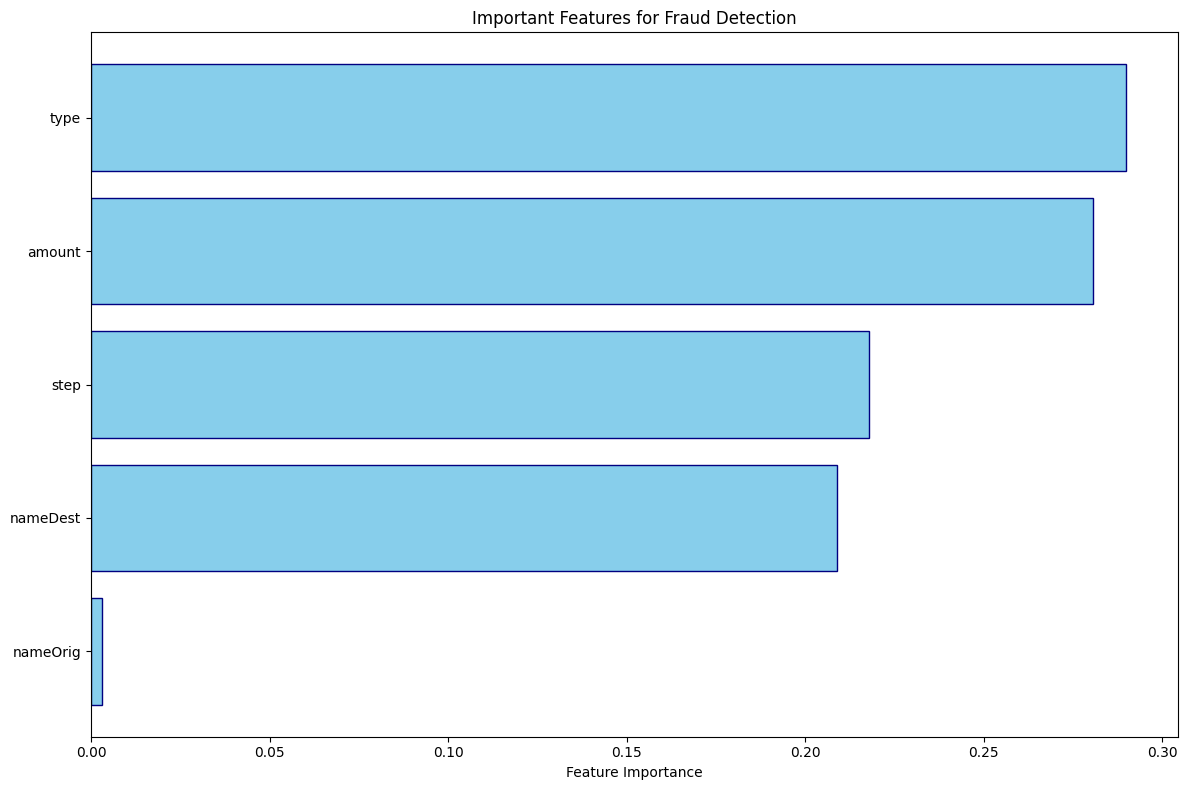

In [81]:
# ANALYSIS: Key Factors that Predict Fraudulent Customers
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.inspection import permutation_importance

def analyze_fraud_predictors(model, X_train, X_test, y_test, feature_names):
    """
    Comprehensive analysis of what factors predict fraud
    """
    print("🔍 ANALYZING KEY FRAUD PREDICTORS")
    print("="*60)
    
    # 1. Feature Importance from the model
    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        print("\n📊 MODEL-BASED FEATURE IMPORTANCE:")
        print(feature_importance.head(10))
        
        # Plot feature importance
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.head(10)
        plt.barh(range(len(top_features)), top_features['importance'], 
                color='skyblue', edgecolor='navy')
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Feature Importance')
        plt.title('Important Features for Fraud Detection')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
    
    return feature_importance if hasattr(model, 'feature_importances_') else None

# Get the best model from our comparison
best_model_obj = models[best_model_name]
feature_names = X_train.columns.tolist()

# Analyze fraud predictors
model_importance = analyze_fraud_predictors(
    best_model_obj, X_train_balanced, X_test, y_test, feature_names
)


📊 CORRELATION WITH FRAUD TARGET
Top Positive Correlations (Higher values → More Fraud):
isFraud           1.000000
amount            0.048094
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
nameOrig         -0.000464
nameDest         -0.021963
Name: isFraud, dtype: float64

Top Negative Correlations (Higher values → Less Fraud):
isFraud           1.000000
amount            0.048094
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
nameOrig         -0.000464
nameDest         -0.021963
Name: isFraud, dtype: float64


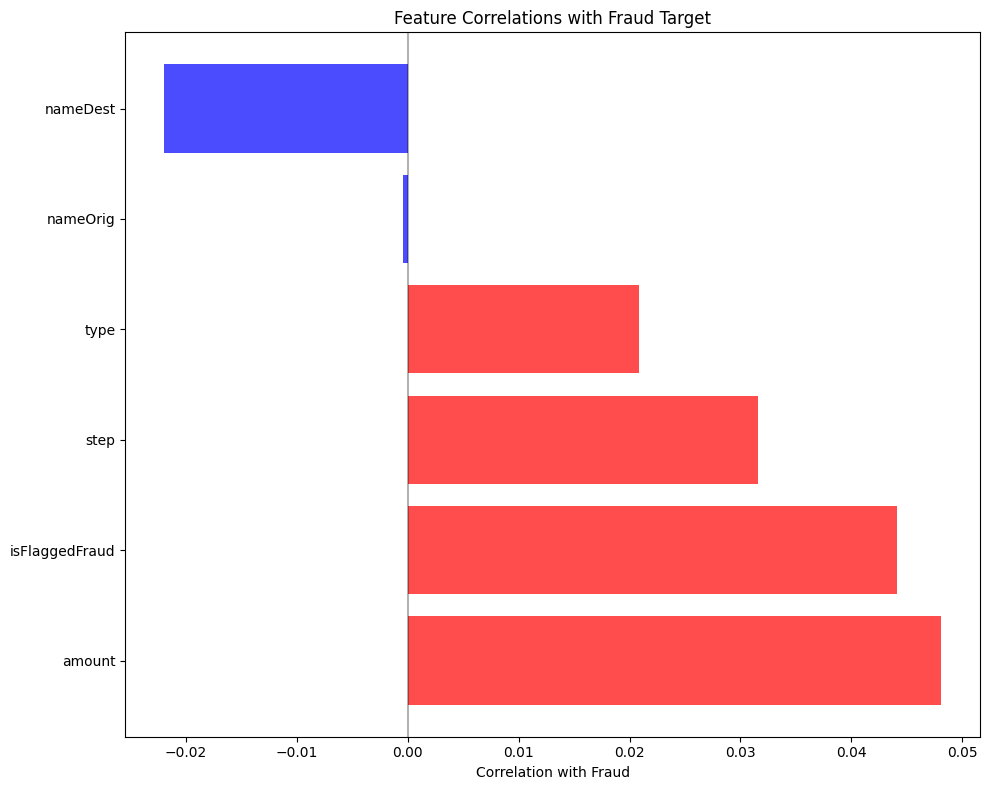

In [82]:
# CORRELATION ANALYSIS: What Features Correlate with Fraud
def fraud_correlation_analysis(df):
    """
    Analyze correlations between features and fraud
    """
    print("\n📊 CORRELATION WITH FRAUD TARGET")
    print("="*45)
    
    # Calculate correlations with fraud target
    correlations = df.corr()['isFraud'].sort_values(ascending=False)
    
    print("Top Positive Correlations (Higher values → More Fraud):")
    print(correlations.head(10))
    
    print("\nTop Negative Correlations (Higher values → Less Fraud):")
    print(correlations.tail(10))
    
    # Plot correlation with fraud
    plt.figure(figsize=(10, 8))
    fraud_corr = correlations.drop('isFraud')  # Remove self-correlation
    colors = ['red' if x > 0 else 'blue' for x in fraud_corr.values]
    
    plt.barh(range(len(fraud_corr)), fraud_corr.values, color=colors, alpha=0.7)
    plt.yticks(range(len(fraud_corr)), fraud_corr.index)
    plt.xlabel('Correlation with Fraud')
    plt.title('Feature Correlations with Fraud Target')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return correlations

fraud_correlations = fraud_correlation_analysis(df)